# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

**Import data**

In [ ]:
# link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here

Onlretail = pd.read_csv('https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv', encoding = 'latin1')

In [ ]:
# Print out First 5 rows from dataframe
# Your code here
Onlretail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Print out brief info
Onlretail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [ ]:
Onlretail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
Onlretail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [ ]:
# List all NaN values
#Check column CustomerID
Onlretail[Onlretail['CustomerID'].isnull()].sample(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
88946,543826,21790,VINTAGE SNAP CARDS,1,2/14/11 9:41,1.63,NaN,United Kingdom
60437,541422,21195,PINK HONEYCOMB PAPER BALL,3,1/17/11 17:48,1.63,NaN,United Kingdom
453015,575477,22337,ANGEL DECORATION PAINTED ZINC,4,11/9/11 16:14,0.63,NaN,United Kingdom
290713,562417,22227,HANGING HEART MIRROR DECORATION,2,8/4/11 16:32,1.25,NaN,United Kingdom
274906,560926,22289,HANGING METAL CHICKEN DECORATION,10,7/22/11 9:20,1.25,NaN,United Kingdom
157545,550207,22659,LUNCH BOX I LOVE LONDON,2,4/15/11 10:38,2.46,NaN,United Kingdom
441248,574561,23006,TRAVEL CARD WALLET FLOWER MEADOW,1,11/4/11 15:52,0.83,NaN,United Kingdom
294571,562715,22341,LOVE GARLAND PAINTED ZINC,2,8/8/11 15:34,3.29,NaN,United Kingdom
515189,579777,47480,HANGING PHOTO CLIP ROPE LADDER,1,11/30/11 15:13,3.29,NaN,United Kingdom
259478,559693,23198,PANTRY MAGNETIC SHOPPING LIST,1,7/11/11 16:21,3.29,NaN,United Kingdom


In [ ]:
#Check Description column
Onlretail[Onlretail['Description'].isnull()]
#Hầu hết các row có Description == Null và CustormerID == Null 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/10 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/10 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,12/1/10 14:34,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,12/1/10 14:35,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,12/1/10 14:35,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,12/1/10 16:50,0.0,NaN,United Kingdom


In [ ]:
#Loại bỏ hết các giá trị null
Onlretail = Onlretail.dropna()

In [ ]:
#Chuyển CustormerID sang kiểu int64
Onlretail['CustomerID'] = Onlretail['CustomerID'].astype('int64')

In [ ]:
Onlretail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Exclude negative Quatity entries**

In [ ]:
Onlretail.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#Chỉ có column Quanlity có giá trị < 0
#loại các giá trị âm 
Onlretail = Onlretail[Onlretail['Quantity'] >= 0]

In [ ]:
Onlretail.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


** *italicized text*Exclude negative Price entries**

In [ ]:

Onlretail = Onlretail[Onlretail['UnitPrice'] >= 0]

In [ ]:
Onlretail.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      397924 non-null object
StockCode      397924 non-null object
Description    397924 non-null object
Quantity       397924 non-null int64
InvoiceDate    397924 non-null object
UnitPrice      397924 non-null float64
CustomerID     397924 non-null int64
Country        397924 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 27.3+ MB


In [ ]:
#Check các column xem có các column không có giá trị hay không
print( 'InvoiceNo: ' , Onlretail['InvoiceNo'].nunique() )
print( 'StockCode: ' , Onlretail['StockCode'].nunique() )
print( 'InvoiceDate: ' , Onlretail['InvoiceDate'].nunique() )
print( 'CustomerID: ' , Onlretail['CustomerID'].nunique() )
print( 'Country: ' , Onlretail['Country'].nunique() )

InvoiceNo:  18536
StockCode:  3665
InvoiceDate:  17286
CustomerID:  4339
Country:  37


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [ ]:
#group by dựa trên country, trong các country dựa trên customer ID
Cus_UK = Onlretail.groupby(by=['Country', 'CustomerID'], as_index=False)['InvoiceNo'].count()
Cus_UK = Cus_UK[(Cus_UK['Country'] == 'United Kingdom')]
print ('The customer with the highest number of orders comes from the United Kingdom: ', Cus_UK[Cus_UK['InvoiceNo'] == Cus_UK['InvoiceNo'].max()]['CustomerID'])


The customer with the highest number of orders comes from the United Kingdom:  4016    17841
Name: CustomerID, dtype: int64


In [ ]:
Cus_UK = Onlretail[(Onlretail['Country'] == 'United Kingdom')]
Cus_UK = Cus_UK.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
Cus_UK.sort_values(by = 'InvoiceNo', ascending=False).head(1)

,CustomerID,InvoiceNo
3594,17841,7847


**The customer with the highest money spent on purchases comes from Netherlands**

In [ ]:

Onlretail['TotalPrice'] = Onlretail['Quantity'] * Onlretail['UnitPrice']

In [ ]:
# Your code here
Cus_Nether = Onlretail.groupby(by=['Country','CustomerID'], as_index=False)['TotalPrice'].sum()
print('The customer with the highest money spent on purchases comes from Netherlands: ')
Cus_Nether.sort_values(by='TotalPrice', ascending=False).head(1)


The customer with the highest money spent on purchases comes from Netherlands: 


,Country,CustomerID,TotalPrice
318,Netherlands,14646,280206.02


**On which year had the highest sales?**

In [ ]:
Onlretail['InvoiceDate'] = pd.to_datetime(Onlretail.InvoiceDate, format='%m/%d/%y %H:%M')

In [ ]:
Onlretail['Year'] = Onlretail['InvoiceDate'].dt.year

In [ ]:
# Your code here
Year_Sale = Onlretail.groupby(by='Year', as_index=False)['TotalPrice'].sum()
print('On which year had the highest sales: ')
Year_Sale.sort_values(by='TotalPrice', ascending=False).head(1)

On which year had the highest sales: 


,Year,TotalPrice
1,2011,8.338694e+06


**How many orders (per hour)?**

In [ ]:
N_Onlretail = Onlretail

In [ ]:
N_Onlretail['Hour'] = Onlretail['InvoiceDate'].dt.hour
Orders_per_hour = N_Onlretail.groupby(by = 'Hour', as_index=False)['InvoiceNo'].count()
Orders_per_hour

,Hour,InvoiceNo
0,6,1
1,7,379
2,8,8691
3,9,21945
4,10,37999
5,11,49092
6,12,72069
7,13,64031
8,14,54127
9,15,45372


**Make a plot about number of orders per hour**

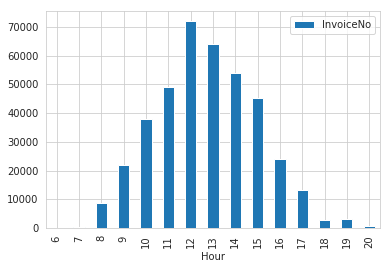

In [ ]:

Orders_per_hour.plot(x = 'Hour', kind = 'bar');

**How many orders (per month)?**

In [ ]:
N_Onlretail['InvoiceDate'].dt.year.unique()

array([2010, 2011])

In [ ]:
N_Onlretail['Month'] = Onlretail['InvoiceDate'].dt.month
Orders_per_month = N_Onlretail.groupby(by = ['Year', 'Month'], as_index=False)['InvoiceNo'].count()
Orders_per_month


,Year,Month,InvoiceNo
0,2010,12,26160
1,2011,1,21232
2,2011,2,19928
3,2011,3,27177
4,2011,4,22644
5,2011,5,28322
6,2011,6,27185
7,2011,7,26827
8,2011,8,27013
9,2011,9,40030


**Make a plot about number of orders per month**

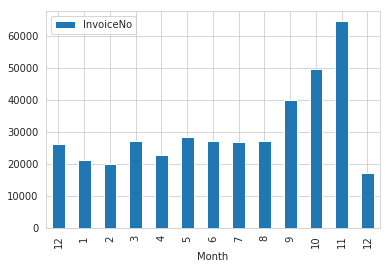

In [ ]:
Orders_per_month.plot(x='Month', y = 'InvoiceNo', kind = 'bar')

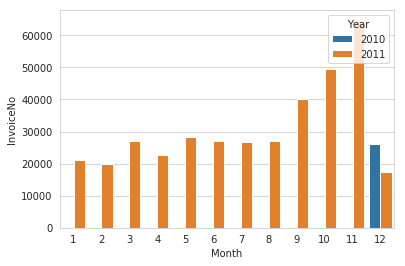

In [ ]:
sns.barplot(x="Month", y = "InvoiceNo", hue = "Year", data=Orders_per_month);

**Top 10 items most sales**

In [ ]:
N_Onlretail['Description'] = N_Onlretail['Description'].str.lower().str.replace(" ", "")

In [ ]:
#N_Onlretail['Description'].sample(30)
 N_Onlretail['Description'].sample(5)

434871    christmasmetalpostcardwithbells
402138       set6schoolmilkbottlesincrate
115389                    wrapdaisycarpet
443092            vintagechristmasbunting
233190                 minijigsawleapfrog
Name: Description, dtype: object

In [ ]:
Top_items = N_Onlretail.groupby(by = ['Description'], as_index=False)['TotalPrice'].sum()

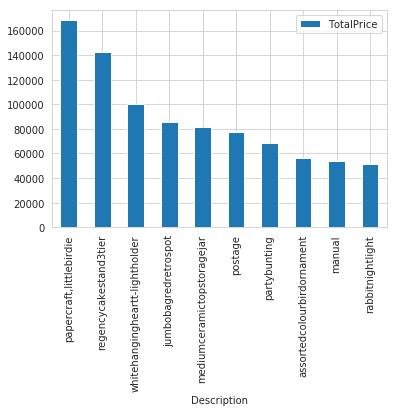

In [ ]:
Top_items.sort_values(by = 'TotalPrice', ascending=False).head(10).plot(kind='bar', x='Description', y = 'TotalPrice')

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

In [ ]:
Top_country = N_Onlretail.groupby(by = ['Country'], as_index=False)['TotalPrice'].sum()

In [ ]:
#except UK
Top_country = Top_country[Top_country['Country'] != "United Kingdom"]
Top_country

,Country,TotalPrice
0,Australia,138521.31
1,Austria,10198.68
2,Bahrain,548.40
3,Belgium,41196.34
4,Brazil,1143.60
5,Canada,3666.38
6,Channel Islands,20450.44
7,Cyprus,13590.38
8,Czech Republic,826.74
9,Denmark,18955.34


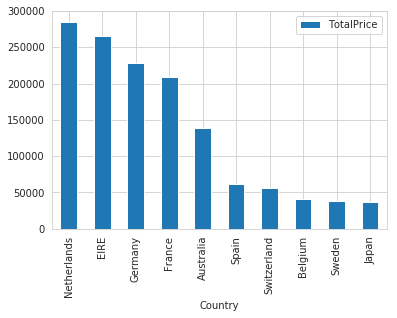

In [ ]:
Top_country.sort_values(by = 'TotalPrice', ascending=False).head(10).plot(kind='bar', x='Country', y = 'TotalPrice')